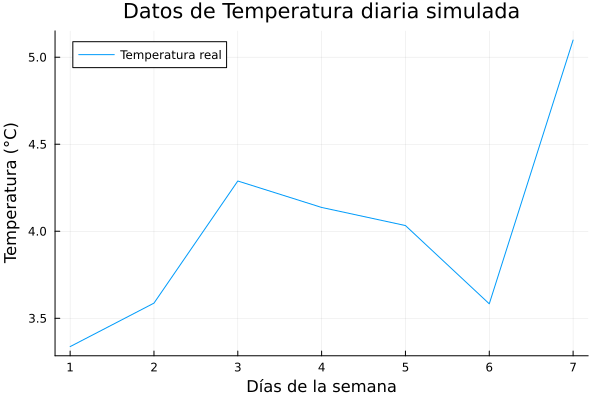

In [27]:
using Plots

# Generación de datos simulados
n_dias = 7
dias = 1:n_dias
true_temps = 15 .+ 10 .* sin.(2 * pi * (dias .- 80) ./ 365) .+ randn(n_dias) # Temperaturas con variabilidad aleatoria

# Graficar los datos simulados
plot(dias, true_temps, label="Temperatura real", xlabel="Días de la semana", ylabel="Temperatura (°C)", title="Datos de Temperatura diaria simulada")

<h1>Interpolacion de Lagrange</h1>

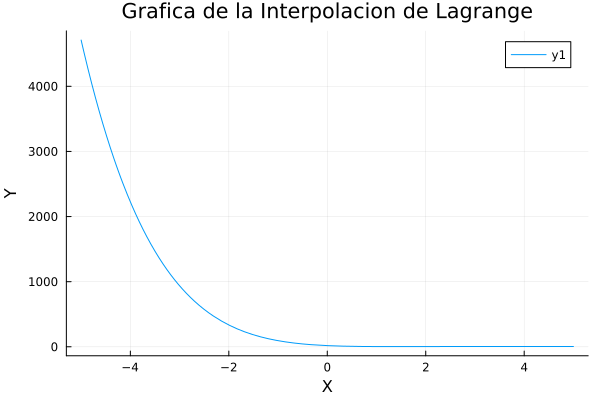

In [28]:
function InterpolacionGeneradorLagrange(xv,yv)
    function InterpolacionLagrange(x)
        numvalstoevaluate = length(x)
        numvalstoevaluate == 1 ? output = 0 : output = zeros(numvalstoevaluate)
        for k = 1:numvalstoevaluate
            N = length(xv)
            LagrangePolynomials = ones(N)
            for i in 1:N  
                for j in [1:i-1;i+1:N]    
                    LagrangePolynomials[i] = LagrangePolynomials[i].*(x[k]-xv[j])./(xv[i]-xv[j])
                end
            end
            numvalstoevaluate == 1 ? output = sum(LagrangePolynomials.*yv) : output[k] = sum(LagrangePolynomials.*yv)
        end
        return output
    end
    return InterpolacionLagrange
end

interpolacionfunc = InterpolacionGeneradorLagrange(dias,true_temps)
plot(interpolacionfunc, xlabel="X", ylabel="Y", title="Grafica de la Interpolacion de Lagrange")